Before building the model, we need to do some preprocessing with basetable.

I. Data preprocessing ( check the data quality)

1. Missing Values
2. Multicollinearity 
3. outliners 

Regression analysis 

In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.getcwd()

'/Users/echo/Desktop/BigData/Group_Assignment'

In [3]:
# basetable for tweets related variables
basetable_tweets = pd.read_csv('./data/basetable_tweets.csv',sep=';').iloc[:,1:]
basetable_tweets.head()

,id,pos_sentiment_osm_sum,neg_sentiment_osm_sum,neg_sentiment_esm_sum,pos_sentiment_esm_sum,rt_sum_osm,rt_avg_osm,rt_sum_esm,rt_avg_esm,uf_sum_osm,...,ufav_sum_osm,ufav_avg_osm,ufav_sum_esm,ufav_avg_esm,us_sum_osm,us_avg_osm,us_sum_esm,us_avg_esm,Tweet_media_type_photo_sum,Hashtags_sum
0,356623885,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,842927992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1215883931,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1481065444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1954018882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# basetable for project related variables
basetable_ks = pd.read_csv('./data/basetable_ks.csv',sep=';').iloc[:,1:]
basetable_ks.head()

,label,id,project_description,staff_pick,goal,Category_project,duration,pledged,backers_count
0,1,1440011688,missing,Missing,500.0,Missing,30,NaN,NaN
1,1,689293158,missing,Missing,2000.0,Missing,30,NaN,NaN
2,1,39986636,missing,Missing,18000.0,Missing,30,NaN,NaN
3,1,520882120,missing,Missing,10000.0,Missing,30,NaN,NaN
4,1,1347440454,missing,Missing,6000.0,Missing,30,NaN,NaN


In [15]:
# merge these two using project id 
final_df = basetable_tweets.merge(basetable_ks,on='id',how='inner')
len(final_df['id'].unique())

28622

# I. Data exploration

# II. Preprocessing



## 2.1 Missing value impulation

In [33]:
final_df.columns

Index(['id', 'pos_sentiment_osm_sum', 'neg_sentiment_osm_sum',
       'neg_sentiment_esm_sum', 'pos_sentiment_esm_sum', 'rt_sum_osm',
       'rt_avg_osm', 'rt_sum_esm', 'rt_avg_esm', 'uf_sum_osm', 'uf_avg_osm',
       'uf_sum_esm', 'uf_avg_esm', 'ufr_sum_osm', 'ufr_avg_osm', 'ufr_sum_esm',
       'ufr_avg_esm', 'ufav_sum_osm', 'ufav_avg_osm', 'ufav_sum_esm',
       'ufav_avg_esm', 'us_sum_osm', 'us_avg_osm', 'us_sum_esm', 'us_avg_esm',
       'Tweet_media_type_photo_sum', 'Hashtags_sum', 'label',
       'project_description', 'staff_pick', 'goal', 'Category_project',
       'duration', 'pledged', 'backers_count'],
      dtype='object')

In [34]:
# remove project_description/staff_pick/Category_project and some variables that represents the same info: the average count of retweet and the summed count of tweet
final_df = final_df.drop(columns=['project_description','staff_pick','rt_sum_osm','rt_sum_esm','uf_sum_osm','uf_sum_esm','ufr_sum_osm','ufr_sum_esm','ufav_sum_osm','ufav_sum_esm','us_sum_osm','us_sum_esm'])
# change [pledged] ==> pledged/goal (get percentage )  
final_df['percentage_pledged']=final_df.apply(lambda x:x['pledged']/x['goal'] if not np.isnan(x['pledged']) else 0,axis=1)

In [35]:
# check percentage of missing value 
final_df.isnull().sum()/len(final_df)

# after checked the percentage of missing value per each column
#we noticed that some variables have more than 50% of missing values, pledged amount, backers_count, variables related OSM 
# it's due to the fact that the data we scraped from kickstrater may have some missing value or the majority of project have no any support that the fisrt 25% of duration 
# and the social media activities are mostly promoted by ESM 

id                            0.000000
pos_sentiment_osm_sum         0.957375
neg_sentiment_osm_sum         0.957375
neg_sentiment_esm_sum         0.803368
pos_sentiment_esm_sum         0.803368
rt_avg_osm                    0.957375
rt_avg_esm                    0.803368
uf_avg_osm                    0.957375
uf_avg_esm                    0.803368
ufr_avg_osm                   0.957375
ufr_avg_esm                   0.803368
ufav_avg_osm                  0.957375
ufav_avg_esm                  0.803368
us_avg_osm                    0.957375
us_avg_esm                    0.803368
Tweet_media_type_photo_sum    0.782720
Hashtags_sum                  0.782720
label                         0.000000
goal                          0.000000
Category_project              0.000000
duration                      0.000000
pledged                       0.725456
backers_count                 0.725456
percentage_pledged            0.000000
dtype: float64

In [37]:
# remove those campaigns that have no social activities 
campaign_without_sm =final_df[final_df['rt_avg_osm'].isnull() & final_df['rt_avg_esm'].isnull()]
campaign_without_sm['label'].value_counts()

1    15350
0     7053
Name: label, dtype: int64

In [38]:
# remove those campaigns :
remove = final_df[(final_df['rt_avg_osm'].isnull()) & (final_df['rt_avg_esm'].isnull())].index
final_df.drop(remove,inplace=True)

In [39]:
# imputation with median: all numeric variables

for i in final_df.columns:
    if final_df[i].isnull().any() == True:
        final_df=final_df.fillna({i:final_df[i].mean()})
        

In [40]:
# remove pledged 
#final_df=final_df.drop(columns=['pledged'])

In [41]:
# duration : change it to categorical variables: 
final_df['duration'].value_counts()

final_df['duration'] = np.where(final_df['duration']>=30,60,30)

final_df['duration'].value_counts()

60    4583
30    1636
Name: duration, dtype: int64

In [42]:

dummies = pd.get_dummies(final_df['duration'],prefix='duration')
final_df = final_df.join(dummies).drop(columns=['duration','duration_60'])


In [43]:
final_df.columns

Index(['id', 'pos_sentiment_osm_sum', 'neg_sentiment_osm_sum',
       'neg_sentiment_esm_sum', 'pos_sentiment_esm_sum', 'rt_avg_osm',
       'rt_avg_esm', 'uf_avg_osm', 'uf_avg_esm', 'ufr_avg_osm', 'ufr_avg_esm',
       'ufav_avg_osm', 'ufav_avg_esm', 'us_avg_osm', 'us_avg_esm',
       'Tweet_media_type_photo_sum', 'Hashtags_sum', 'label', 'goal',
       'Category_project', 'pledged', 'backers_count', 'percentage_pledged',
       'duration_30'],
      dtype='object')

## 2.2 Multicolinearity

Multicollinearity occurs when there are two or more independent variables in a multiple regression model, which have a high correlation among themselves. When some features are highly correlated, we might have difficulty in distinguishing between their individual effects on the dependent variable. Multicollinearity can be detected using various techniques, one such technique being the Variance Inflation Factor(VIF).

In VIF method, we pick each feature and regress it against all of the other features. For each regression, the factor is calculated as :

VIF=\frac{1}{1-R^2}

Where, R-squared is the coefficient of determination in linear regression. Its value lies between 0 and 1.

As we see from the formula, greater the value of R-squared, greater is the VIF. Hence, greater VIF denotes greater correlation. This is in agreement with the fact that a higher R-squared value denotes a stronger collinearity. Generally, a VIF above 5 indicates a high multicollinearity. 

As we see from the formula, greater the value of R-squared, greater is the VIF. Hence, greater VIF denotes greater correlation. This is in agreement with the fact that a higher R-squared value denotes a stronger collinearity. Generally, a VIF above 5 indicates a high multicollinearity. 

In [44]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

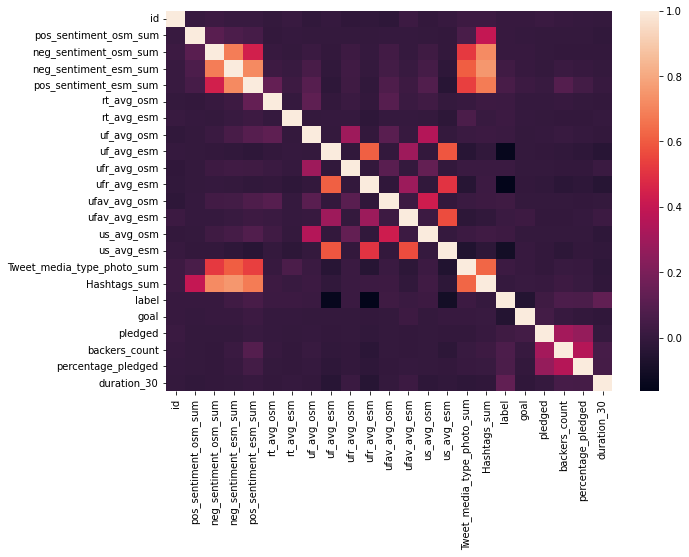

In [45]:
#Method 1 to Detect MultiCollinearity
plt.rcParams["figure.figsize"] = (10,7)
sns.heatmap(final_df.corr())
plt.show()

In [58]:
dataFrame.loc[:, (dataFrame.columns !='id')&(dataFrame.columns !='label')&(dataFrame.columns !='Category_project')]

,pos_sentiment_osm_sum,neg_sentiment_osm_sum,neg_sentiment_esm_sum,pos_sentiment_esm_sum,rt_avg_osm,rt_avg_esm,uf_avg_osm,uf_avg_esm,ufr_avg_osm,ufr_avg_esm,...,ufav_avg_esm,us_avg_osm,us_avg_esm,Tweet_media_type_photo_sum,Hashtags_sum,goal,pledged,backers_count,percentage_pledged,duration_30
8,2.447541,0.603279,0.000000,1.000000,5.526198,0.000000,3563.094358,412.000000,982.10688,233.000000,...,1203.000000,8854.187024,823.000000,1.0,1.0,8000.0,5515.290000,74.00,0.689411,0
12,2.447541,0.603279,0.000000,2.000000,5.526198,0.500000,3563.094358,1069.000000,982.10688,1621.000000,...,91662.500000,8854.187024,18111.000000,0.0,2.0,38500.0,4933.500000,179.00,0.128143,1
29,0.000000,0.000000,0.749467,2.452026,2.000000,1.432957,8.000000,5754.908267,8.00000,2779.639978,...,18065.309367,4.000000,27513.677453,0.0,1.0,1800.0,58070.821965,270.35,0.000000,0
33,2.447541,0.603279,0.000000,1.000000,5.526198,0.000000,3563.094358,25807.500000,982.10688,18019.000000,...,634.500000,8854.187024,17716.000000,0.0,3.0,2500.0,58070.821965,270.35,0.000000,0
36,2.447541,0.603279,0.000000,0.000000,5.526198,0.000000,3563.094358,1.000000,982.10688,27.000000,...,8.000000,8854.187024,66.000000,0.0,1.0,30000.0,1.000000,1.00,0.000033,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28593,2.447541,0.603279,0.000000,1.000000,5.526198,0.000000,3563.094358,59.500000,982.10688,384.500000,...,1720.000000,8854.187024,99.000000,0.0,2.0,2750.0,58070.821965,270.35,0.000000,1
28599,2.447541,0.603279,0.000000,1.000000,5.526198,0.000000,3563.094358,132.000000,982.10688,304.000000,...,4667.000000,8854.187024,446.000000,0.0,1.0,8000.0,58070.821965,270.35,0.000000,0
28607,2.447541,0.603279,0.000000,0.000000,5.526198,0.000000,3563.094358,124.000000,982.10688,188.000000,...,1639.000000,8854.187024,1309.000000,0.0,1.0,8019.0,58070.821965,270.35,0.000000,0
28608,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,393.000000,634.000000,97.00000,623.000000,...,1171.000000,193.000000,45556.000000,0.0,2.0,17000.0,58070.821965,270.35,0.000000,1


In [59]:
def get_VIF(dataFrame , target):
    X = add_constant(dataFrame.loc[:, (dataFrame.columns !='id')&(dataFrame.columns !='label')&(dataFrame.columns !='Category_project')])
    seriesObject = pd.Series([variance_inflation_factor(X.values,i) for i in range(X.shape[1])] , index=X.columns,)
    return seriesObject



In [60]:
target = 'label'
print(get_VIF(final_df,target))

const                         4.508114
pos_sentiment_osm_sum         1.590858
neg_sentiment_osm_sum         2.659609
neg_sentiment_esm_sum         3.519361
pos_sentiment_esm_sum         2.808233
rt_avg_osm                    1.057816
rt_avg_esm                    1.008672
uf_avg_osm                    1.263990
uf_avg_esm                    1.947395
ufr_avg_osm                   1.103517
ufr_avg_esm                   1.697220
ufav_avg_osm                  1.247944
ufav_avg_esm                  1.492453
us_avg_osm                    1.388083
us_avg_esm                    2.149030
Tweet_media_type_photo_sum    1.851606
Hashtags_sum                  5.525336
goal                          1.004247
pledged                       1.148650
backers_count                 1.232445
percentage_pledged            1.187335
duration_30                   1.009772
dtype: float64



as we can see, hashtage_sum has really high value,which means hashtage_sum shows MultiCollinearity.
if we checked the correlation between hashtage_sum and other variables in correlation plot, it is noted that hashtage_sum is highly correlated with pos_sentiment_os,'pos_sentiment_osm_sum', 'neg_sentiment_osm_sum',
       'neg_sentiment_esm_sum', 'pos_sentiment_esm_sum'. Which indicates that normally users that show strong altitude in their tweets are more likely to put hashtage in their tweet. 


In [61]:
# remove "Hashtags_sum"

final_df = final_df.drop(columns=['Hashtags_sum'])

In [62]:
final_df.to_csv('twitter_ks_basetable.csv')

In [ ]:
v

## 2.3 Outliners

Outliers can be detected and treated in different ways: graphically or statistically (e.g., Z-scores). We will focus on one of the most common ways to spot outliers: box plots and histograms.

I will apply R package to handle outliners( the code is attached below )

# Feature selection

logit model regression based model ( p- values)


some references:
interpretation of summary (p-value )
 https://investigate.ai/regression/evaluating-logistic-regressions/
 
 http://www.science.smith.edu/~jcrouser/SDS293/labs/lab4-py.html
 
 tutorial : https://www.statsmodels.org/dev/gettingstarted.html
 
 https://stats.oarc.ucla.edu/stata/output/logistic-regression-analysis/

In [13]:
final_df = pd.read_csv('./data/twitter_ks_basetable.csv').iloc[:,1:]
final_df.head()

,label,goal,pledged,backers_count,pos_sentiment_osm_sum,neg_sentiment_osm_sum,neg_sentiment_esm_sum,pos_sentiment_esm_sum,rt_avg_osm,rt_avg_esm,...,uf_avg_esm,ufr_avg_osm,ufr_avg_esm,ufav_avg_osm,ufav_avg_esm,us_avg_osm,us_avg_esm,Tweet_media_type_photo_sum,percentage_pledged,duration_30
0,1,1000.0,58070.821965,270.35,2.000000,2.000000,0.749467,2.452026,2.000000,1.432957,...,5754.908267,196.00000,2779.639978,3163.000000,18065.309367,9790.000000,27513.677453,0,0.0,0
1,1,30000.0,58070.821965,270.35,2.447541,0.603279,0.000000,0.000000,5.526198,0.000000,...,26347.000000,982.10688,2245.000000,9472.900154,5899.000000,8854.187024,16596.000000,0,0.0,0
2,0,3550.0,58070.821965,270.35,2.447541,0.603279,0.000000,1.000000,5.526198,0.000000,...,30742.000000,982.10688,11724.500000,9472.900154,44207.500000,8854.187024,143832.000000,0,0.0,0
3,0,11000.0,58070.821965,270.35,1.000000,0.000000,0.749467,2.452026,0.000000,1.432957,...,5754.908267,2023.00000,2779.639978,83.000000,18065.309367,1249.000000,27513.677453,0,0.0,0
4,0,8000.0,58070.821965,270.35,1.000000,0.000000,0.749467,2.452026,0.000000,1.432957,...,5754.908267,23.00000,2779.639978,1.000000,18065.309367,14.000000,27513.677453,2,0.0,0


In [16]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod import families

In [64]:
# get all independent variables 
list_column = list(final_df.columns)

list_column.remove('label')

formula=str(list_column[0])

for num in range(len(list_column)):
    if num>=1:
        formula=formula+"+"+str(list_column[num])
        


In [65]:
formula1  = "label ~"+formula

In [67]:
model1=smf.logit(formula=formula1,data=final_df).fit()

Optimization terminated successfully.
         Current function value: 0.296965
         Iterations 13


In [68]:
print(model1.summary())

                           Logit Regression Results                           
Dep. Variable:                  label   No. Observations:                 6214
Model:                          Logit   Df Residuals:                     6193
Method:                           MLE   Df Model:                           20
Date:                Tue, 30 Aug 2022   Pseudo R-squ.:                  0.2159
Time:                        18:04:27   Log-Likelihood:                -1845.3
converged:                       True   LL-Null:                       -2353.4
Covariance Type:            nonrobust   LLR p-value:                1.453e-202
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -1.5892      0.197     -8.088      0.000      -1.974      -1.204
goal                       -1.194e-07    3.3e-08     -3.622      0.000   -1.84e-07 

In [71]:
# or use this function
model = GLM(final_df['label'],final_df.iloc[:,1:],family=sm.families.Binomial()).fit()


In [72]:
print(model.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                  label   No. Observations:                 6214
Model:                            GLM   Df Residuals:                     6194
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1884.2
Date:                Tue, 30 Aug 2022   Deviance:                       3768.4
Time:                        18:06:17   Pearson chi2:                 4.22e+05
No. Iterations:                    12   Pseudo R-squ. (CS):             0.1402
Covariance Type:            nonrobust                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
goal                

In [73]:
print("Coefficeients")
print(model.params)
print()
print("p-Values")
print(model.pvalues)
print()
print("Dependent variables")
print(model.model.endog_names)

Coefficeients
goal                         -1.132425e-07
pledged                       2.186422e-06
backers_count                 6.403473e-03
pos_sentiment_osm_sum        -4.991219e-05
neg_sentiment_osm_sum        -1.026481e-01
neg_sentiment_esm_sum         1.391057e-01
pos_sentiment_esm_sum         6.754442e-02
rt_avg_osm                    6.374344e-03
rt_avg_esm                    7.133831e-03
uf_avg_osm                    8.159791e-07
uf_avg_esm                   -6.595459e-06
ufr_avg_osm                  -1.117038e-05
ufr_avg_esm                  -3.112981e-05
ufav_avg_osm                 -4.097333e-07
ufav_avg_esm                  1.366179e-05
us_avg_osm                   -3.890435e-06
us_avg_esm                   -3.987200e-06
Tweet_media_type_photo_sum   -8.922688e-02
percentage_pledged            4.426891e+00
duration_30                   8.387575e-01
dtype: float64

p-Values
goal                          9.519254e-04
pledged                       7.319784e-01
backers_count  